1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/hsang/Downloads/delivery_time.csv')


In [3]:
# checking null values
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
data.skew()


Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [5]:
data.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

<Axes: xlabel='Delivery Time', ylabel='Density'>

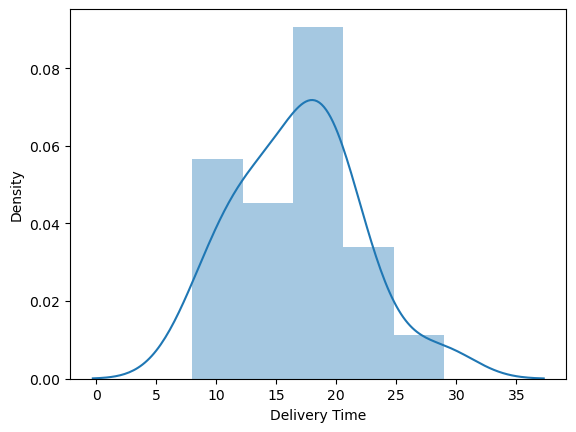

In [6]:
# visualising
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

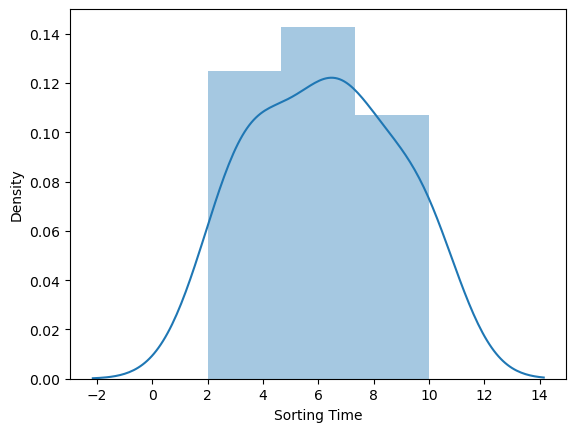

In [7]:
sns.distplot(data['Sorting Time'])

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

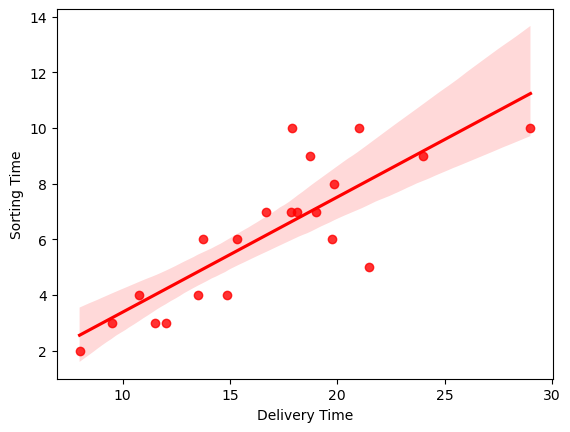

In [8]:
sns.regplot(x = 'Delivery Time',y = 'Sorting Time',data = data, color = 'red')

In [9]:
#checking correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

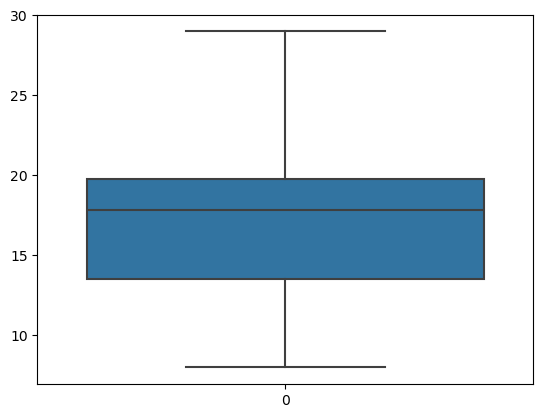

In [10]:
#checking the outliers
sns.boxplot(data['Delivery Time'])

<Axes: >

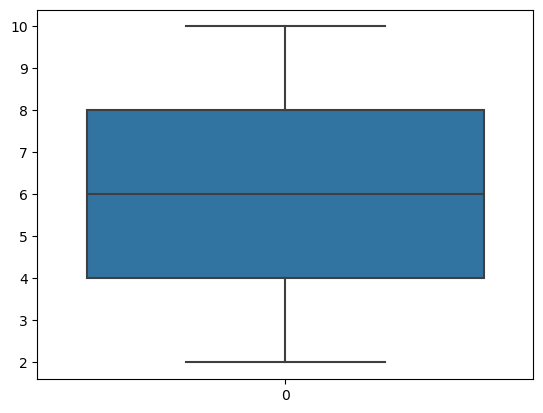

In [11]:
sns.boxplot(data['Sorting Time'])

In [12]:
#renaming dataset
dataset = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis = 1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = dataset).fit()

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [16]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [17]:
model.rsquared

0.6822714748417231

In [18]:
#model prediction formula
delivery_time = 6.582 + 1.649*(5.2)
delivery_time

15.1568

In [19]:
new_data = pd.Series([8,24,16])
pred = pd.DataFrame(new_data,columns=['sorting_time'])

In [20]:
model.predict(pred)

0    19.774893
1    46.159211
2    32.967052
dtype: float64

## Log Transformation

In [54]:
X = data['Delivery Time']
y = data['Sorting Time']


In [56]:
#Checking skewness of the data
print(X.skew())
print(y.skew())

0.3523900822831107
0.047115474210530174


In [77]:
# applying Log transformation and sqrt transformation and checking skewness
X_log = np.log(X)
y_log = np.log(y)

In [78]:
print(X_log.skew())
print(y_log.skew())

-0.4512901148522999
-0.6052357185134765


In [79]:
X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

In [80]:
print(X_sqrt.skew())
print(y_sqrt.skew())

-0.0618105135865213
-0.25981634723613994


### After comparing the skewness values of both transformation, the sqrt transformation is performing better so building the model with sqrt transformation

<Axes: xlabel='Delivery Time', ylabel='Density'>

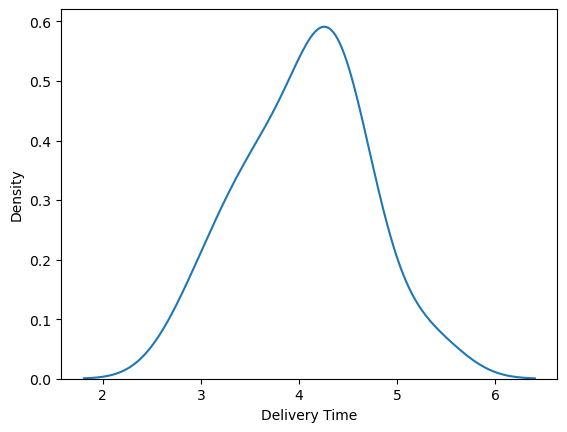

In [81]:
# visualising the distribution for sqrt transformation
sns.kdeplot(X_sqrt)

<Axes: xlabel='Sorting Time', ylabel='Density'>

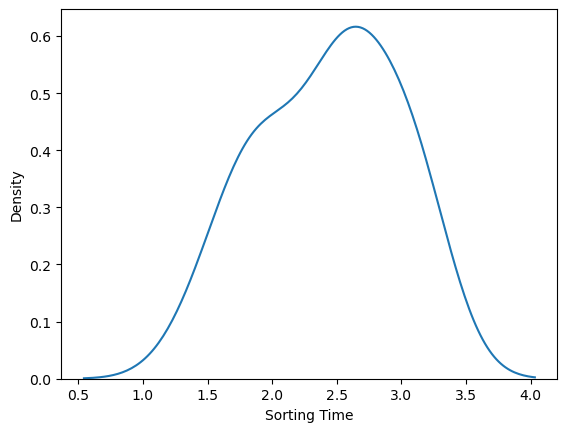

In [82]:
sns.kdeplot(y_sqrt)

In [89]:
#reshaping the data
X_sqrt = np.array(X_sqrt).reshape(-1,1)

In [90]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sqrt,y_sqrt,test_size = 0.25, random_state = 42)


In [91]:
from sklearn.linear_model import LinearRegression
model_sqrt = LinearRegression()
model_sqrt.fit(X_sqrt,y_sqrt)

LinearRegression()

In [93]:
# prediction
y_sqrt_pred = model_sqrt.predict(X_test)
y_sqrt_pred

array([2.81913568, 2.58122079, 2.29155026, 2.15823741, 2.56321632,
       2.33553101])

In [100]:
# checking performance metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rsquare = r2_score(y_test,y_sqrt_pred)
rsquare

0.5597901743248115

In [108]:
MAE = mean_absolute_error(y_test, y_sqrt_pred)
MSE = mean_squared_error(y_test,y_sqrt_pred)
print('MAE:',MAE, 'MSE:',MSE)

MAE: 0.26174670898625524 MSE: 0.10063538729730541


<Axes: ylabel='Sorting Time'>

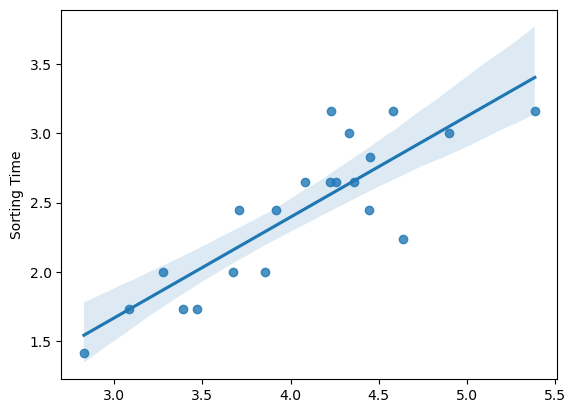

In [109]:
sns.regplot(x = X_sqrt,y = y_sqrt)

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [122]:
data1 = pd.read_csv('C:/Users/hsang/Downloads/Salary_Data.csv')

In [123]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [124]:
#performing EDA
data1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

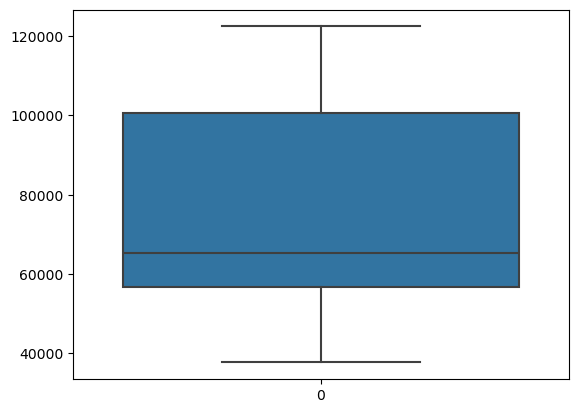

In [125]:
sns.boxplot(data1['Salary'])

<Axes: xlabel='Salary', ylabel='Density'>

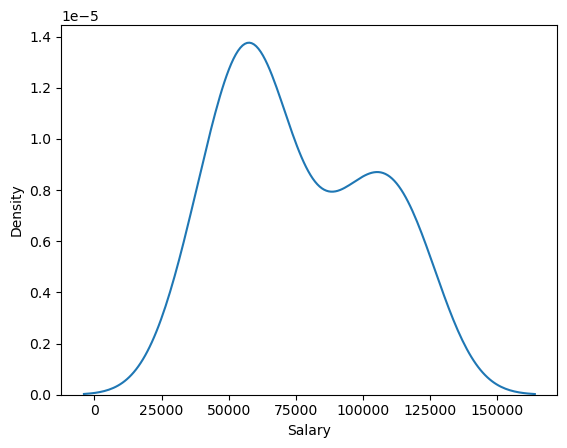

In [126]:
sns.kdeplot(data1['Salary'])

In [127]:
#checking skewness
data1['Salary'].skew()

0.35411967922959153

In [128]:
data1['Salary'].kurt()

-1.295421086394517

In [129]:
# checking correlation
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [130]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data1)
scaled_data

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [131]:
scaled_data = pd.DataFrame(scaled_data,columns=['yearsExperience','Salary'])

In [132]:
scaled_data

,yearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


<Axes: xlabel='yearsExperience', ylabel='Salary'>

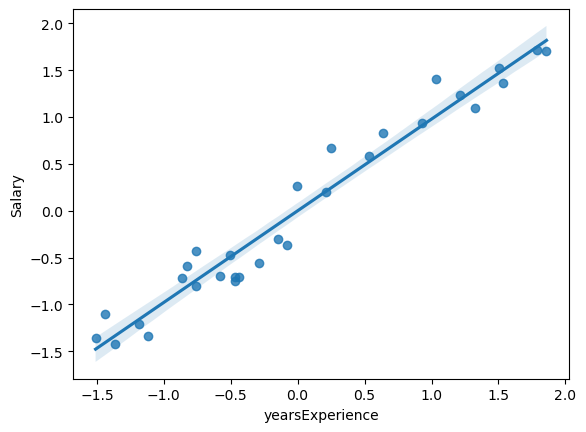

In [133]:
sns.regplot(x = scaled_data['yearsExperience'],y = scaled_data['Salary'])

In [134]:
X = scaled_data[['yearsExperience']]
y = scaled_data[['Salary']]

In [136]:
X.skew()

yearsExperience    0.37956
dtype: float64

In [34]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [35]:
X_train

,yearsExperience
12,-0.470697
0,-1.510053
4,-1.115814
16,-0.076458
5,-0.864935
13,-0.434857
11,-0.470697
22,0.927058
1,-1.438373
2,-1.366693


In [36]:
# fitting the linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
model.coef_

array([[0.97006926]])

In [38]:
model.intercept_

array([-0.02721488])

In [39]:
#predicting the salary
y_pred = model.predict(X_test)
y_pred

array([[ 1.46313696],
       [-0.1709191 ],
       [ 0.97639685],
       [-0.0318505 ],
       [-0.76196066],
       [-0.58812491],
       [ 1.70650701],
       [ 1.1502326 ]])

In [40]:
# checking the accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9347210011126782

In [41]:
# calculating the MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

0.18761820458411815

In [43]:
MSE = mean_squared_error(y_test,y_pred)
MSE

0.05341036259265107

In [44]:
RMSE = np.sqrt(MSE)
RMSE

0.2311068207402176

### Checking log and Sqrt transformation on the data

In [45]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [110]:
data1_log = np.log(data1)
data1_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [111]:
data1_log.skew()

YearsExperience   -0.600565
Salary            -0.044126
dtype: float64

In [112]:
data1_log.kurt()

YearsExperience   -0.281728
Salary            -1.201072
dtype: float64

In [113]:
data1_sqrt = np.sqrt(data1)

In [114]:
data1_sqrt.skew()

YearsExperience   -0.049196
Salary             0.169043
dtype: float64

In [115]:
data1_sqrt.kurt()

YearsExperience   -0.933149
Salary            -1.302813
dtype: float64

In [163]:
X1 = data1_sqrt['YearsExperience']
y1 = data1_sqrt['Salary']

<Axes: xlabel='YearsExperience', ylabel='Density'>

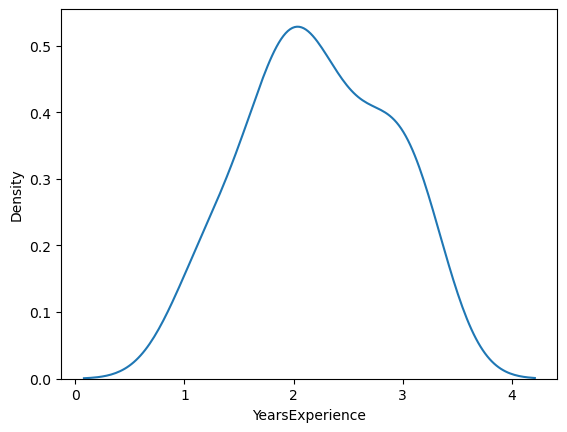

In [139]:
sns.kdeplot(X1)

<Axes: xlabel='Salary', ylabel='Density'>

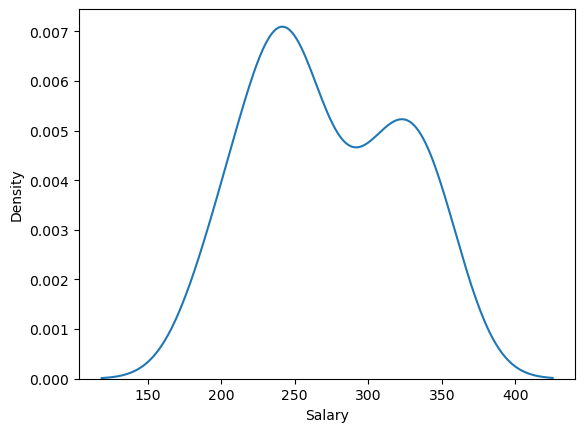

In [140]:
sns.kdeplot(y1)

In [149]:
# reshaping the dimensions
X1 = np.array(X1).reshape(-1,1)

### We can see the sqrt transformation is working better than the log transformation so building model with sqrt transformation

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.25,random_state=0)

In [151]:
from sklearn.linear_model import LinearRegression
model_sqrt2 = LinearRegression()
model_sqrt2.fit(X_train, y_train)

LinearRegression()

In [153]:
# prediction
y_pred_model2 = model_sqrt2.predict(X_test)
y_pred_model2

array([199.53658379, 345.21521872, 258.2671226 , 254.59663956,
       335.88159367, 326.14597533, 337.06924535, 256.44335269])

In [154]:
# checking performance metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rsquare = r2_score(y_test,y_pred_model2)
rsquare

0.9651781126374288

In [159]:
MAE = mean_absolute_error(y_test,y_pred_model2)
MSE = mean_squared_error(y_test,y_pred_model2)
print('MAE:',MAE,'MSE:',MSE)

MAE: 8.114184037628188 MSE: 113.09163284238414


### The sqrt transformation gives the better accuracy of prediction

<Axes: ylabel='Salary'>

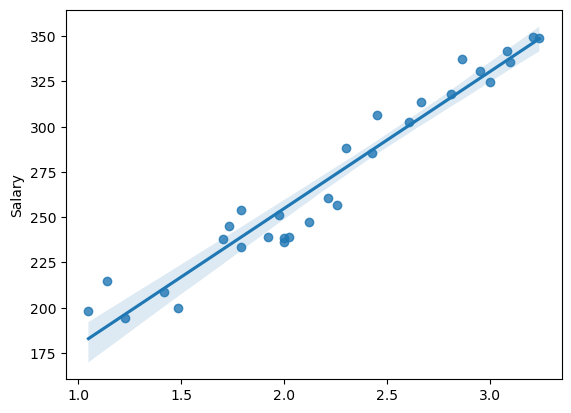

In [160]:
# plotting the linear line
sns.regplot(x = X1, y = y1)